In [20]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def ploteo(n_archivo):
    with open(n_archivo, 'r') as archivo:
        n = 0
        signal = np.array([])
        for linea in archivo:
            if n > 2: 
                vec = linea.split()
                signal = np.append(signal, int(vec[6]))  # Usa vec[6] para obtener el canal 2
            n += 1
        fs = 1000 
        ts = 1 / fs
        t = np.arange(len(signal)) * ts 
        return t, signal

Longitud de la señal: 42600
Columnas generadas por ecg_process: Index(['ECG_Raw', 'ECG_Clean', 'ECG_Rate', 'ECG_Quality', 'ECG_R_Peaks',
       'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 'ECG_Q_Peaks',
       'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 'ECG_T_Peaks',
       'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial',
       'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular',
       'ECG_Phase_Completion_Ventricular'],
      dtype='object')


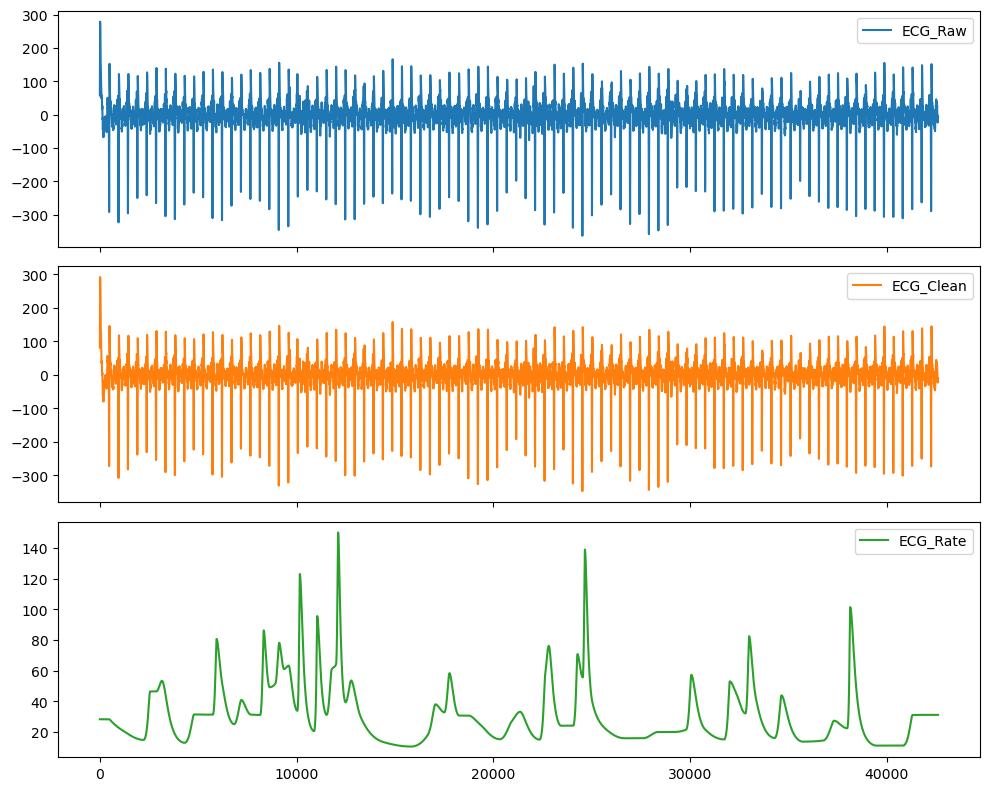

Información de picos R detectados: {'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([  489,  1221,  1687,  2229,  2398,  2875,  3156,  3803,  4450,
        5745,  5930,  6226,  6709,  6824,  7358,  7668,  8149,  8628,
        8921,  9112, 10038, 10463, 10889, 11044, 11525, 11775, 12007,
       12107, 12768, 13290, 14400, 15824, 16658, 16793, 17052, 17279,
       17765, 18088, 18254, 18742, 19352, 19510, 19720, 20333, 20901,
       21354, 21867, 22349, 22617, 22815, 23286, 24059, 24270, 24541,
       24650, 24755, 25030, 25716, 26482, 27598, 27923, 28361, 29099,
       29795, 30057, 30741, 31728, 32012, 32344, 32811, 32994, 33365,
       34295, 34636, 35331, 35729, 36766, 37982, 38452, 39159, 39867,
       40344, 40821, 41303]), 'ECG_R_Peaks_Uncorrected': array([  489,  1221,  1687,  2229,  2398,  2875,  3156,  5745,  5930,
        6226,  6709,  6824,  7358,  7668,  8149,  8628,  8921,  9112,
       10038, 10160, 10889, 11044, 11525, 11775, 12007, 12107, 1276

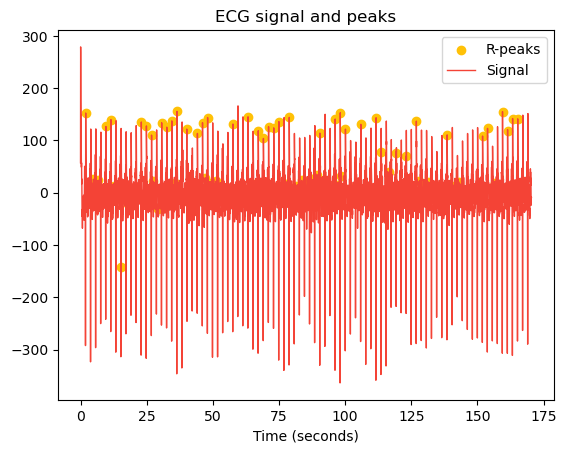

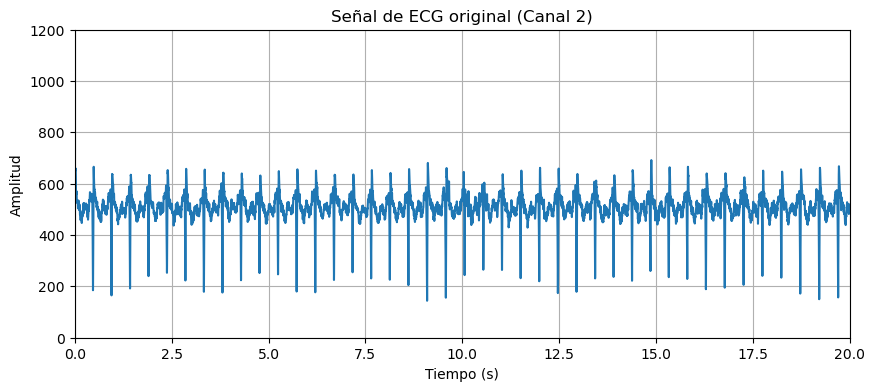

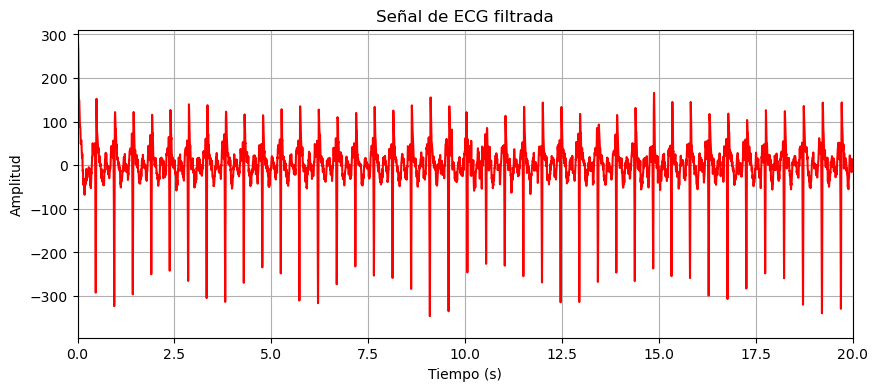

c:\Users\USER\anaconda3\Lib\site-packages\neurokit2\ecg\ecg_plot.py:70: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


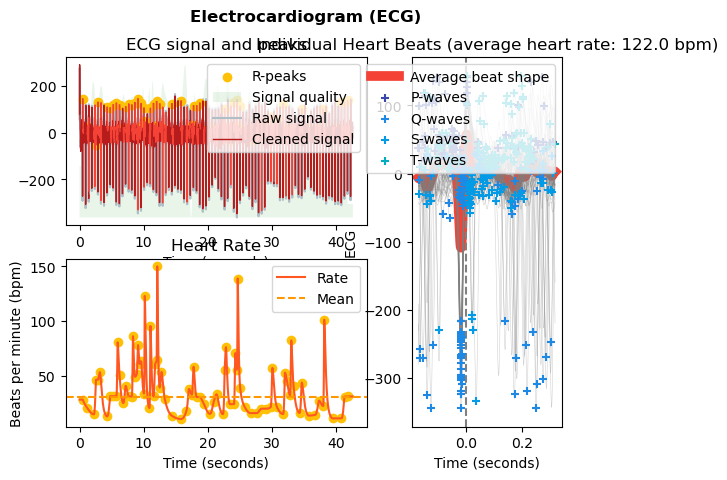

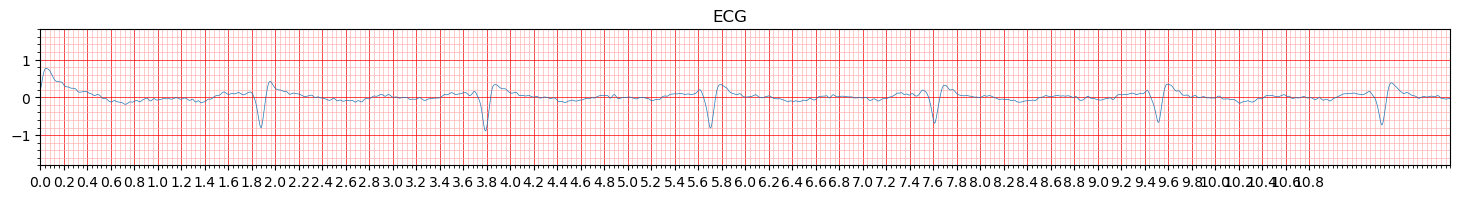

In [ ]:
t, ecg_signal = ploteo("EJERCICIO D3.txt")

# Limpieza del ECG utilizando NeuroKit2
filtered_ecg = nk.ecg_clean(ecg_signal, sampling_rate=250, method="neurokit")

print("Longitud de la señal:", len(filtered_ecg))

# Procesamiento de ECG con NeuroKit2
try:
    signals, info = nk.ecg_process(filtered_ecg, sampling_rate=250)
    
    print("Columnas generadas por ecg_process:", signals.columns)
    
    if "ECG_Clean" in signals.columns:
        signals2 = signals[["ECG_Raw", "ECG_Clean", "ECG_Rate"]]
        signals2.plot(subplots=True, figsize=(10, 8))
        plt.tight_layout()
        plt.show()
    else:
        print("La columna 'ECG_Clean' no se generó correctamente.")
except KeyError as e:
    print(f"Error en ecg_process: {e}")
except Exception as e:
    print(f"Otro error ocurrió: {e}")

# Detectar picos R
try:
    signalsR, info = nk.ecg_peaks(filtered_ecg, sampling_rate=250, correct_artifacts=True, show=True)
    print("Información de picos R detectados:", info)
except Exception as e:
    print(f"Error en la detección de picos R: {e}")

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(t, ecg_signal, label="ECG Raw (Canal 2)")
ax.set_title("Señal de ECG original (Canal 2)")
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Amplitud")
ax.grid()
ax.set_ylim([0, 1200]) 
ax.set_xlim([0, 20])  
plt.show()

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(t[:len(filtered_ecg)], filtered_ecg, label="ECG Filtrado", color='r')
ax.set_title("Señal de ECG filtrada")
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Amplitud")
ax.grid()
ax.set_xlim([0, 20])
plt.show()

normalized_filtered = filtered_ecg / np.max(np.abs(filtered_ecg))
nk.ecg_plot(signals) 
plt.show()

normalized_filtered = filtered_ecg / np.max(np.abs(filtered_ecg))
ecg_plot.plot_1(normalized_filtered[:3000], sample_rate=250)
plt.show()
